In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
dataset = tf.keras.datasets.mnist

In [5]:
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

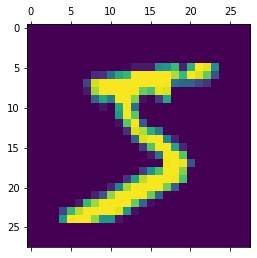

In [6]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0])

In [7]:
# normalizing 
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [13]:
# compile the model
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# train model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6517 - accuracy: 0.8336 - val_loss: 0.3590 - val_accuracy: 0.9036
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3393 - accuracy: 0.9045 - val_loss: 0.2947 - val_accuracy: 0.9205
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2916 - accuracy: 0.9179 - val_loss: 0.2635 - val_accuracy: 0.9280
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9260 - val_loss: 0.2405 - val_accuracy: 0.9333
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2395 - accuracy: 0.9332 - val_loss: 0.2250 - val_accuracy: 0.9366


In [17]:
loss, acc = model.evaluate(X_test, Y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2250 - accuracy: 0.9366
0.22504863142967224
0.9366000294685364


In [18]:
import numpy as np

In [20]:
y_pred = model.predict(X_test)
y_predict_labels = np.argmax(y_pred, axis = 1)
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_predict_labels)
print(cm)

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[ 967    0    1    1    0    2    6    2    1    0]
 [   0 1114    2    2    1    1    4    2    9    0]
 [   8    5  951    6   15    2    8   14   18    5]
 [   2    1   16  933    0   25    1   11   13    8]
 [   1    1    4    1  944    0    8    2    5   16]
 [  10    4    3   22   11  803   15    4   15    5]
 [  14    3    3    1   13   13  909    1    1    0]
 [   2    9   24    3    9    0    0  960    2   19]
 [   7    7    7   15   10   25   12   10  875    6]
 [  11    8    1    8   45    8    1   14    3  910]], shape=(10, 10), dtype=int32)
